# Changing Brightness and Contrast of a grayscale image and plotting histograms

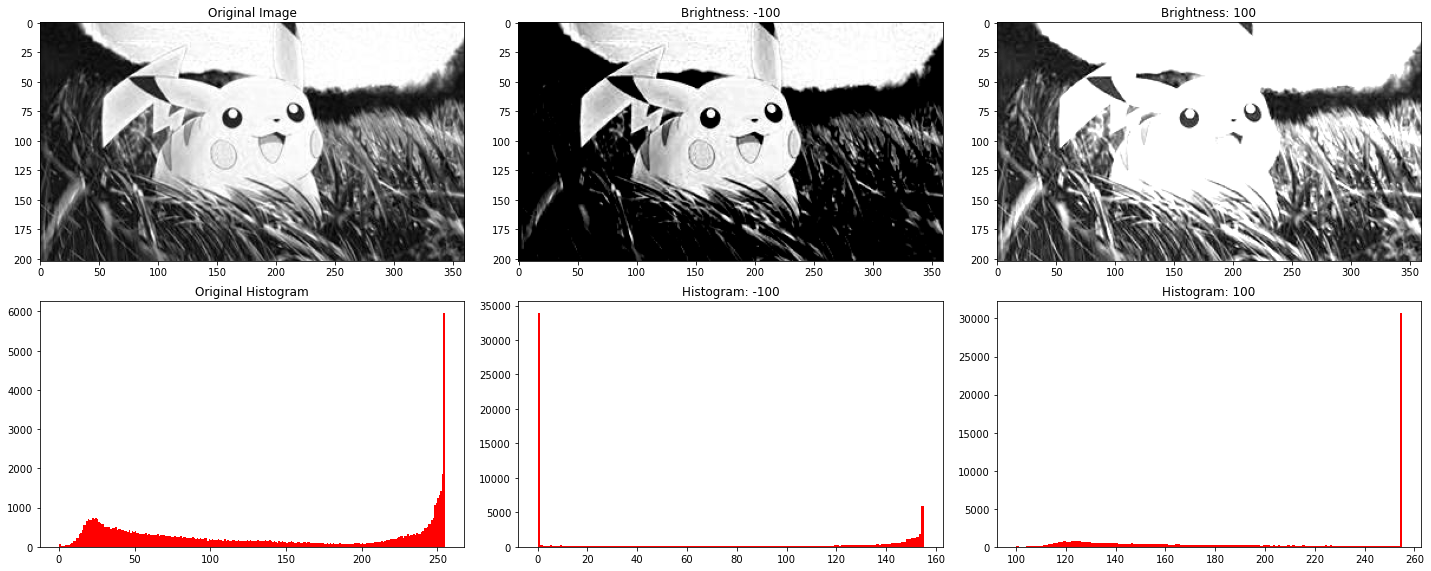

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image
image_path = r"D:\1st_Year_QMS\2nd_Sem\PR\pikachu_bw.jpeg"
image = Image.open(image_path).convert("L")  # Convert to grayscale if not already

# Convert image to numpy array
image_array = np.array(image, dtype=np.int16)

# Define values to increase and decrease brightness
brightness_values = [-100, 100]

# Create subplots
fig, axs = plt.subplots(2, len(brightness_values) + 1, figsize=(20, 8))

# Plot original image and its histogram
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[1, 0].hist(image_array.flatten(), bins=255, color='r')
axs[1, 0].set_title('Original Histogram')

# Loop through brightness values
for i, brightness in enumerate(brightness_values, 1):
    # Increase or decrease brightness by adding or subtracting pixel values
    modified_image_array = np.clip(image_array + brightness, 0, 255)
    
    # Convert numpy array back to image
    modified_image = Image.fromarray(modified_image_array.astype(np.uint8))
    
    # Plot modified image and its histogram
    axs[0, i].imshow(modified_image, cmap='gray')
    axs[0, i].set_title(f'Brightness: {brightness}')
    axs[1, i].hist(modified_image_array.flatten(), bins=255-abs(brightness), color='r')
    axs[1, i].set_title(f'Histogram: {brightness}')

# Show the plot
plt.tight_layout()
plt.show()

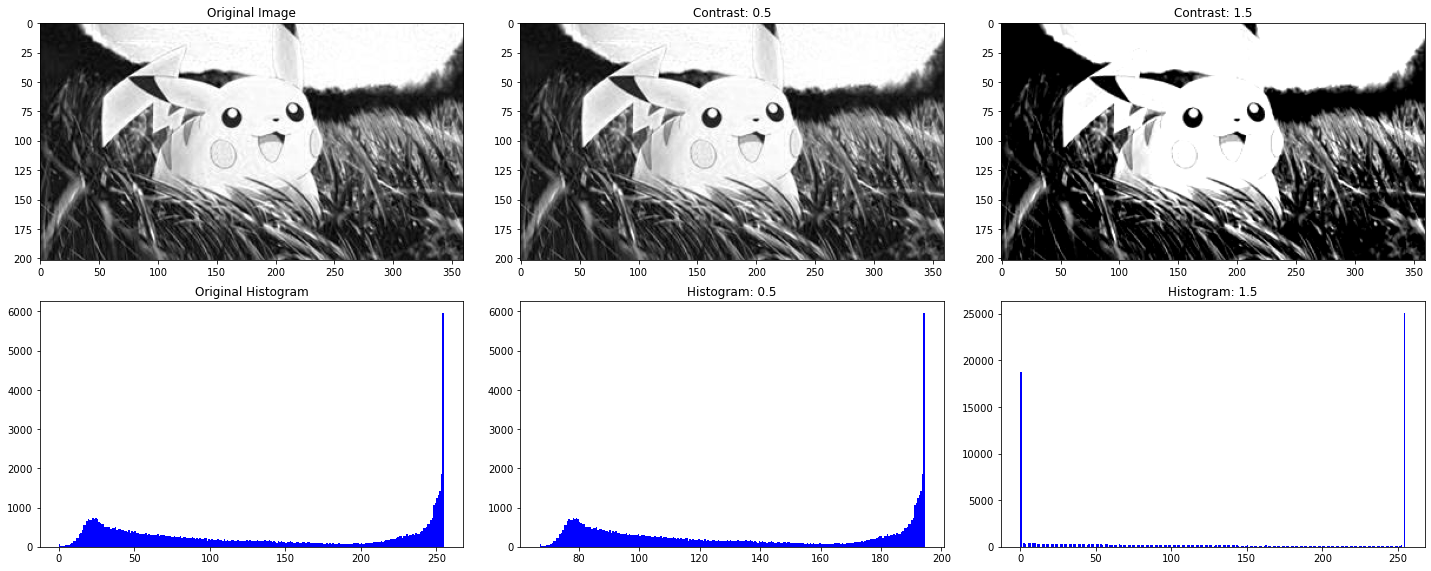

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image
image_path = r"D:\1st_Year_QMS\2nd_Sem\PR\pikachu_bw.jpeg"
image = Image.open(image_path).convert("L")  # Convert to grayscale if not already

# Convert image to numpy array
image_array = np.array(image, dtype=np.int16)

# Define contrast factors
contrast_factors = [0.5, 1.5]

# Create subplots
fig, axs = plt.subplots(2, len(contrast_factors) + 1, figsize=(20, 8))

# Plot original image and its histogram
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[1, 0].hist(image_array.flatten(), bins=255, color='blue')
axs[1, 0].set_title('Original Histogram')

# Loop through contrast factors
for i, factor in enumerate(contrast_factors, 1):
    # Adjust contrast by scaling the difference between pixel values
    mean_pixel_value = np.mean(image_array)
    modified_image_array = np.clip((image_array - mean_pixel_value) * factor + mean_pixel_value, 0, 255)
    
    # Convert numpy array back to image
    modified_image = Image.fromarray(modified_image_array.astype(np.uint8))
    
    # Plot modified image and its histogram
    axs[0, i].imshow(modified_image, cmap='gray')
    axs[0, i].set_title(f'Contrast: {factor}')
    flat_array = np.round_(modified_image_array.flatten()).astype(np.int32)
    axs[1, i].hist(modified_image_array.flatten(), bins=255, color='blue')
    axs[1, i].set_title(f'Histogram: {factor}')

# Show the plot
plt.tight_layout()
plt.show()